In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import xarray as xr

from pymc import HalfCauchy, Model, Normal, sample

In [3]:
from astropy.table import Table

# Load the fits file
data = Table.read('example_data_for_pymc.fits', format='fits')

In [13]:
group = data['group']
x_val = data['xobs']
y_val = data['yobs']
x_err = data['xerr']
y_err = data['yerr']
print(data.colnames)

['group', 'xobs', 'xerr', 'xtrue', 'yobs', 'yerr', 'ytrue']


In [38]:
x_val_0 = x_val[group==0]
x_val_1= x_val[group==1]
x_val_2 = x_val[group==2]


y_val_0 = y_val[group==0]
y_val_1= y_val[group==1]
y_val_2 = y_val[group==2]

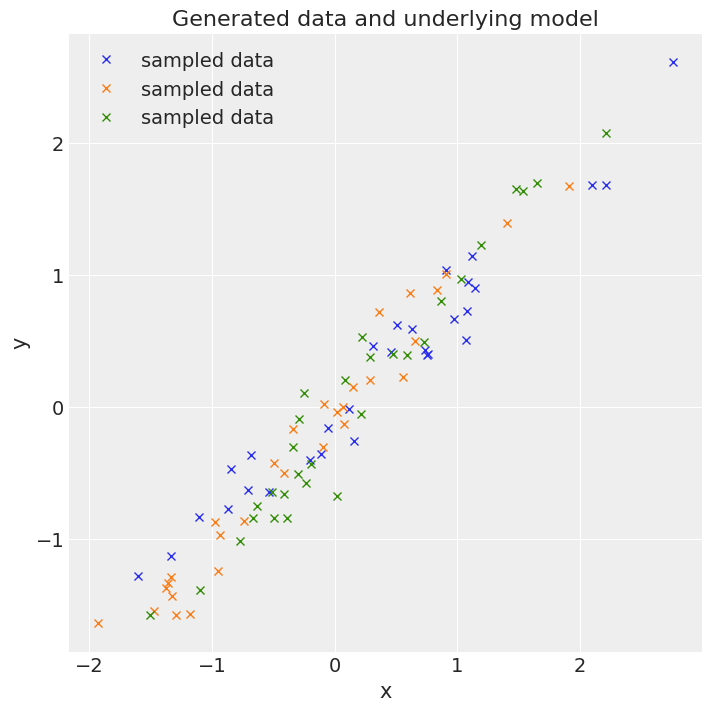

In [39]:
az.style.use("arviz-darkgrid")
fig = plt.figure(figsize=(7, 7))

ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")

ax.plot(x_val_0, y_val_0, "x", label="sampled data")
ax.plot(x_val_1, y_val_1, "x", label="sampled data")
ax.plot(x_val_2, y_val_2, "x", label="sampled data")

#ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0)

In [40]:
with Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy("sigma", beta=10)
    intercept = Normal("Intercept", 0, sigma=20)
    slope = Normal("slope", 0, sigma=20)

    # Define likelihood
    likelihood = Normal("y", mu=intercept + slope * x_val, sigma=sigma, observed=y_val)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, slope]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 108 seconds.


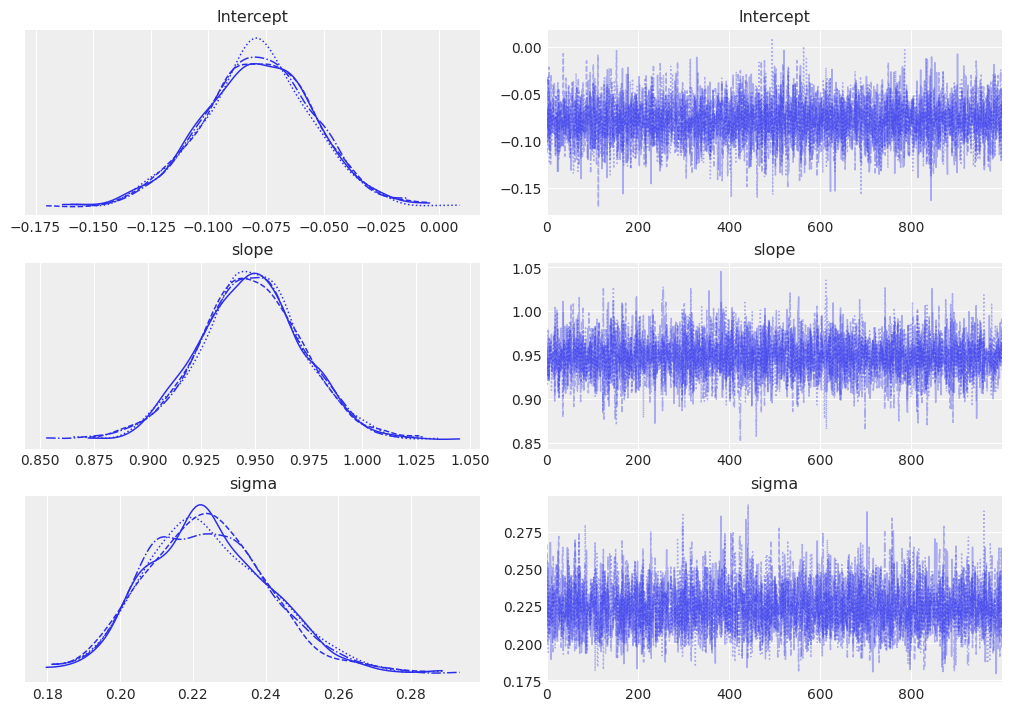

In [44]:
az.plot_trace(idata, figsize=(10, 7));